<a href="https://colab.research.google.com/github/lauracantik/mathtools/blob/main/Tugas15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv ('https://raw.githubusercontent.com/lauracantik/mathtools/main/healthcare-dataset-stroke-data.csv')
pd.DataFrame(dataset)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
# Menampilkan informasi dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean())

X = dataset.iloc [:,[3,4,8,9]]
print("Menampilkan variabel Dependen")
print(X)

print("\n")

Y = dataset.iloc [:, 11]
print("Menampilkan variabel Independen")
print(Y)

Menampilkan variabel Dependen
      hypertension  heart_disease  avg_glucose_level        bmi
0                0              1             228.69  36.600000
1                0              0             202.21  28.893237
2                0              1             105.92  32.500000
3                0              0             171.23  34.400000
4                1              0             174.12  24.000000
...            ...            ...                ...        ...
5105             1              0              83.75  28.893237
5106             0              0             125.20  40.000000
5107             0              0              82.99  30.600000
5108             0              0             166.29  25.600000
5109             0              0              85.28  26.200000

[5110 rows x 4 columns]


Menampilkan variabel Independen
0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype

In [11]:
label_encoder = LabelEncoder()
dataset['stroke']= label_encoder.fit_transform(dataset['stroke']) 
dataset['stroke'].unique()
label_encoder_y = LabelEncoder()
Y = label_encoder_y.fit_transform(Y)
print(Y)

[1 1 1 ... 0 0 0]


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)

#input data train pada fungsi klasifikasi
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [13]:
# Menentukan hasil prediksi dari X_test
y_pred=classifier.predict(X_test)
print(y_pred)

# Menentukan probabilitas dari hasil prediksi
classifier.predict_proba(X_test)

[0 0 0 ... 0 0 0]


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
# tampilkan hasil dari confussion matrix
print(confusion_matrix(Y_test,y_pred))

# tampilkan hasil ketepatan nilai precision , recall
print(classification_report(Y_test, y_pred))

accuracy= accuracy_score(Y_test, y_pred)*100
print("Accuracy of our model is equal " + str(round(accuracy, 2)) + " %.")

[[1439    5]
 [  89    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533

Accuracy of our model is equal 93.87 %.


<Figure size 432x288 with 0 Axes>

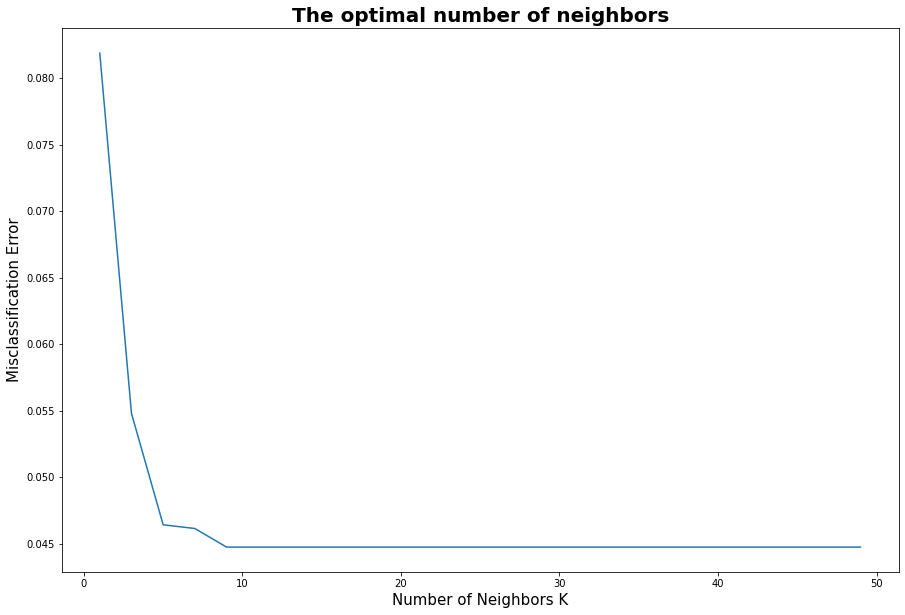

In [15]:
#membuat list of K for KNN
k_list = list(range(1,50,2))
cv_scores = []
# melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [16]:
# Mencari Nilai K yang terbaik

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
